In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range=15,
                                    width_shift_range=0.15,
                                    height_shift_range=0.15,
                                    shear_range=0.15,
                                    zoom_range=0.15,
                                    horizontal_flip=True,
                                  )
val_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
#Batch Size and Image Size
batch_sz = 64
sz = 48

train_generator = train_datagen.flow_from_directory('../input/fer-dsc-v3/final_data_v5/final_data_v5/Train',
                                                    batch_size = batch_sz,
                                                    class_mode='categorical',
                                                    target_size=(sz,sz))

val_generator = val_datagen.flow_from_directory('../input/fer-dsc-v3/final_data_v5/final_data_v5/Test',
                                                    batch_size = batch_sz,
                                                    class_mode='categorical',
                                                    target_size=(sz,sz))

Found 13651 images belonging to 4 classes.
Found 1649 images belonging to 4 classes.


In [4]:
from keras.applications.vgg16 import VGG16

In [5]:
pre_model = VGG16(include_top = False,
                 weights = 'imagenet',
                 input_shape = (48,48,3))

58892288/58889256 [==============================] - 0s 0us/step


In [6]:
for layer in pre_model.layers:
    layer.trainable=False

In [7]:
last_output = pre_model.get_layer('block5_conv1').output

In [8]:
x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(256,activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(128,activation= 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(4,activation='softmax')(x)

In [9]:
model = tf.keras.Model(pre_model.input, x)

In [10]:
opt = tf.keras.optimizers.RMSprop(learning_rate=1e-5)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_generator,
                   validation_data=val_generator,
                    steps_per_epoch=train_generator.samples//train_generator.batch_size,
                   validation_steps=val_generator.samples//val_generator.batch_size,
                    epochs=30
                    )

Epoch 1/30
213/213 [==============================] - 42s 195ms/step - loss: 1.7592 - accuracy: 0.2820 - val_loss: 1.3649 - val_accuracy: 0.3244
Epoch 2/30
213/213 [==============================] - 23s 107ms/step - loss: 1.4988 - accuracy: 0.2955 - val_loss: 1.3303 - val_accuracy: 0.3444
Epoch 3/30
213/213 [==============================] - 23s 107ms/step - loss: 1.4096 - accuracy: 0.3199 - val_loss: 1.3097 - val_accuracy: 0.3862
Epoch 4/30
213/213 [==============================] - 24s 111ms/step - loss: 1.3798 - accuracy: 0.3358 - val_loss: 1.2957 - val_accuracy: 0.4056
Epoch 5/30
213/213 [==============================] - 22s 104ms/step - loss: 1.3629 - accuracy: 0.3428 - val_loss: 1.2850 - val_accuracy: 0.4275
Epoch 6/30
213/213 [==============================] - 23s 106ms/step - loss: 1.3568 - accuracy: 0.3469 - val_loss: 1.2658 - val_accuracy: 0.4275
Epoch 7/30
213/213 [==============================] - 22s 103ms/step - loss: 1.3352 - accuracy: 0.3660 - val_loss: 1.2582 - val_ac

In [12]:
for layer in model.layers:
    layer.trainable = True

In [13]:
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)      

In [14]:
opt1 = tf.keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(optimizer = opt1, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history1 = model.fit(train_generator,
                    validation_data = val_generator,
                    validation_steps = val_generator.samples // val_generator.batch_size,
                    epochs = 25)
                    #callbacks = [callbacks])

Epoch 1/25
214/214 [==============================] - 23s 108ms/step - loss: 1.1612 - accuracy: 0.4804 - val_loss: 0.9332 - val_accuracy: 0.5919
Epoch 2/25
214/214 [==============================] - 23s 108ms/step - loss: 0.9568 - accuracy: 0.5912 - val_loss: 0.8796 - val_accuracy: 0.6181
Epoch 3/25
214/214 [==============================] - 24s 113ms/step - loss: 0.8838 - accuracy: 0.6327 - val_loss: 0.8063 - val_accuracy: 0.6669
Epoch 4/25
214/214 [==============================] - 23s 109ms/step - loss: 0.8293 - accuracy: 0.6614 - val_loss: 0.7916 - val_accuracy: 0.6700
Epoch 5/25
214/214 [==============================] - 23s 108ms/step - loss: 0.7907 - accuracy: 0.6819 - val_loss: 0.7363 - val_accuracy: 0.6994
Epoch 6/25
214/214 [==============================] - 24s 110ms/step - loss: 0.7672 - accuracy: 0.6877 - val_loss: 0.7258 - val_accuracy: 0.7050
Epoch 7/25
214/214 [==============================] - 23s 107ms/step - loss: 0.7431 - accuracy: 0.7044 - val_loss: 0.6983 - val_ac

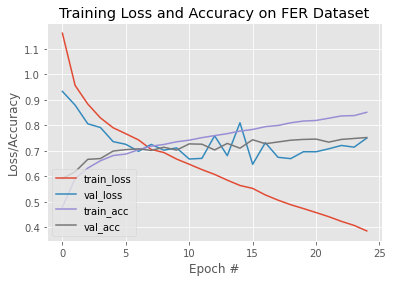

In [16]:
N = 25
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history1.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history1.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on FER Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [17]:
model.save('VGG_16_modified.h5')

In [18]:
model.save_weights('VGG16_modified_weights.h5')

In [22]:
from keras.models import model_from_json
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('VGG16_modified_model.json', 'w') as json_file:
    json_file.write(json_model)

In [23]:
test = '../input/fer-dsc-v3/final_data_v5/final_data_v5/Test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory (test, batch_size=256, class_mode='categorical', target_size=(48,48))

Found 1649 images belonging to 4 classes.


In [24]:
model.evaluate(test_generator, steps=4)

4/4 [==============================] - 0s 90ms/step - loss: 0.7792 - accuracy: 0.7539


[0.779201865196228, 0.75390625]